In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
#Se elimina la columna de fecha de defunción y también la de edad, esta última es porque al ser la única variable que no es booleana, complica los resultados. 

df = pd.read_csv('/content/covid_clean.csv')
df = df.drop(['FECHA_DEF', 'EDAD'], axis=1)
df = df.dropna()
df = df.sample(n=50000, random_state=42)

df.head()

,SEXO,INTUBADO,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
56601,0,0,0,0,0,0,0,0,0,0,0,0,0
29275,0,0,0,0,0,0,0,0,0,0,0,0,0
100259,0,0,0,0,0,0,0,0,0,0,0,0,0
55947,0,0,1,0,0,0,0,0,0,0,0,0,0
81357,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Se escalan los datos para asegurar que ninguna variable especifica domine el algoritmo. 

scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [ ]:
#Se reduce la dimensionalidad. 
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_std)

In [ ]:
# entrenar el modelo de Mean Shift

ms = MeanShift()
ms.fit(df_pca)
labels = ms.predict(df_pca)

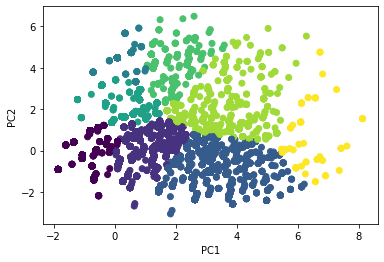

In [ ]:
# visualización de los resultados

plt.scatter(df_pca[:,0], df_pca[:,1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calcular el índice de Silhouette
silhouette_avg = silhouette_score(df_pca, labels)
print("El índice de Silhouette es:", silhouette_avg)

El índice de Silhouette es: 0.5009983134334942
